In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt 
import seaborn as sns

D:\New folder\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
D:\New folder\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
data=pd.read_csv("my_movies.csv")
data.head(5)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
final_data=data.iloc[:,5:]
final_data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [4]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


# APRIORI ALGORITHM

In [11]:
frequent_itemsets = apriori(final_data, min_support=0.2, use_colnames=True,max_len=3)
frequent_itemsets

D:\New folder\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Sixth Sense, Green Mile)"


<AxesSubplot:xlabel='support', ylabel='itemsets'>

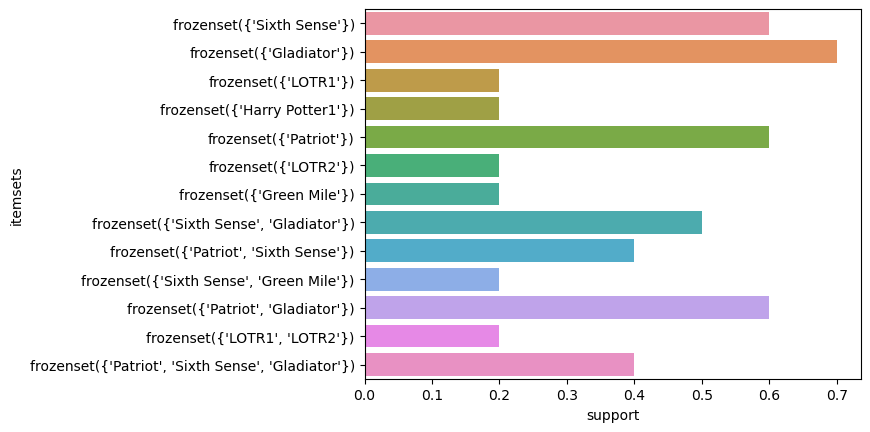

In [14]:
sns.barplot(data=frequent_itemsets,x="support",y="itemsets")

In [13]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


In [18]:
viz=pd.DataFrame(rules[["antecedents","consequents"]].astype(str).apply("-".join,axis=1),columns=["ant&con"])
viz

,ant&con
0,frozenset({'Sixth Sense'})-frozenset({'Gladiat...
1,frozenset({'Gladiator'})-frozenset({'Sixth Sen...
2,frozenset({'Green Mile'})-frozenset({'Sixth Se...
3,frozenset({'Patriot'})-frozenset({'Gladiator'})
4,frozenset({'Gladiator'})-frozenset({'Patriot'})
5,frozenset({'LOTR1'})-frozenset({'LOTR2'})
6,frozenset({'LOTR2'})-frozenset({'LOTR1'})
7,"frozenset({'Patriot', 'Sixth Sense'})-frozense..."
8,"frozenset({'Sixth Sense', 'Gladiator'})-frozen..."


In [19]:
viz["support"]=rules["support"]
viz["confidence"]=rules["confidence"]
viz["lift"]=rules["lift"]

In [20]:
viz

,ant&con,support,confidence,lift
0,frozenset({'Sixth Sense'})-frozenset({'Gladiat...,0.5,0.833333,1.190476
1,frozenset({'Gladiator'})-frozenset({'Sixth Sen...,0.5,0.714286,1.190476
2,frozenset({'Green Mile'})-frozenset({'Sixth Se...,0.2,1.000000,1.666667
3,frozenset({'Patriot'})-frozenset({'Gladiator'}),0.6,1.000000,1.428571
4,frozenset({'Gladiator'})-frozenset({'Patriot'}),0.6,0.857143,1.428571
5,frozenset({'LOTR1'})-frozenset({'LOTR2'}),0.2,1.000000,5.000000
6,frozenset({'LOTR2'})-frozenset({'LOTR1'}),0.2,1.000000,5.000000
7,"frozenset({'Patriot', 'Sixth Sense'})-frozense...",0.4,1.000000,1.428571
8,"frozenset({'Sixth Sense', 'Gladiator'})-frozen...",0.4,0.800000,1.333333


<AxesSubplot:xlabel='support', ylabel='confidence'>

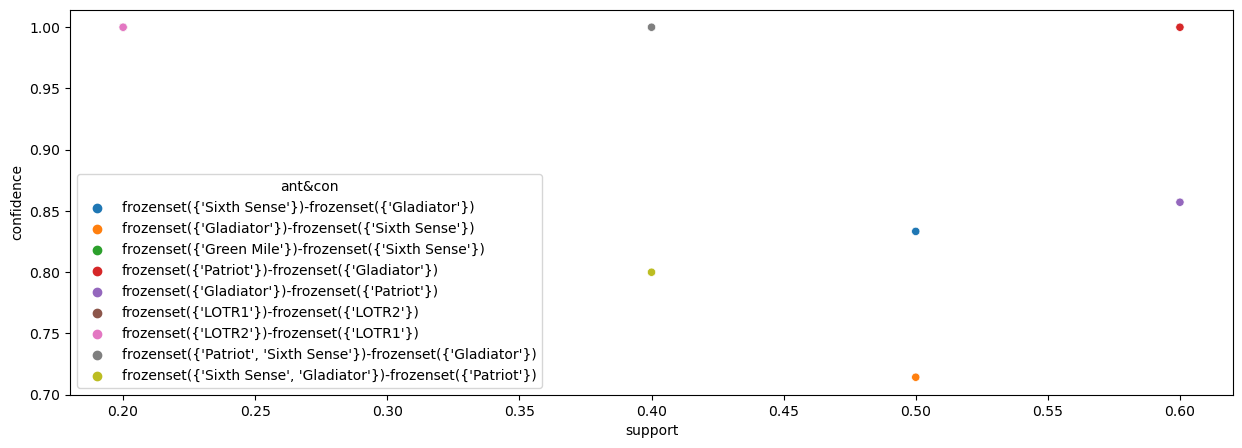

In [32]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=viz,x="support",y="confidence",hue="ant&con")
